<a href="https://colab.research.google.com/github/iftekhar14/Seoul-Bike-Sharing-Regression-Project/blob/main/Seoul_Bike_Sharing_Demand_Prediction_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title :**  **Seoul Bike Sharing Demand Prediction**
##**Project type -  Regression**
##**Contribution - Individual**


---



---

# **Problem Description**
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.
Data Description
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.
Attribute Information:
### Date : year-month-day
### Rented Bike count - Count of bikes rented at each hour
### Hour - Hour of he day
### Temperature-Temperature in Celsius
### Humidity - %
### Windspeed - m/s
### Visibility - 10m
### Dew point temperature - Celsius
### Solar radiation - MJ/m2
### Rainfall - mm
### Snowfall - cm
### Seasons - Winter, Spring, Summer, Autumn
### Holiday - Holiday/No holiday
### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Introduction to the project**

In this project, i would want to try and implement various machine learning model to predict a regression problem to the best of my abilities. This project will involve:


1. Exploratory data analysis: In this section we will take a look at the features we have and by using different visualization techniques, find relationships among them.

2. Data Wrangling: In this section we will try to modify our dataset, handle missing values, outliers, form new columns, convert data types, etc.

3. Splitting data and Standardization: Here we will split out data into train and test sets and apply standardization methods.

4. Fit different models: We will use some ML algorithms such as Linear regression, Decision tree, Random forest etc. and also check the performance using different evaluation metrics. We will also do hyperparameter tuning and implement regularization techniques to improve performance.

5. Model Explainability: In this section we will see what goes on inside the model we built.

6. Conclusion: Finally, we will try to dig insights from our experiment and frame all the observations made during the analysis.

***Lets begin!***

In [ ]:
# importing python libraries that would help us immensely during our endeavour
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# to not get tensed over unnecessary warnings we will ignore them
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
seoul_df=pd.read_csv('/content/drive/MyDrive/Regression Project/SeoulBikeData.csv',encoding= 'unicode_escape')
seoul_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#columns of the datset
seoul_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# finding the types of data in each column
seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# finding total no of rows in dataset
print("The no of rows in the dataset is: ",len(seoul_df))

The no of rows in the dataset is:  8760


In [ ]:
seoul_df.describe(include = 'all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


# **1. Exploratory Data Analysis**

# **Univariate analysis**

**1. "Rental Bike Count" - Dependent variable(dv)**

Sice it is the most important variable in the data, we will try to examine it first by finding the descriptive stats of the data and its distribution.

In [ ]:
# descriptive stats of dv
seoul_df['Rented Bike Count'].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

After considering the min, max, 25% and 75% values of the variable, we can conclude that there may be outliers in the data and we would check that using a box plot

Text(0.5, 1.0, "Boxplot of 'Rented bike count'")

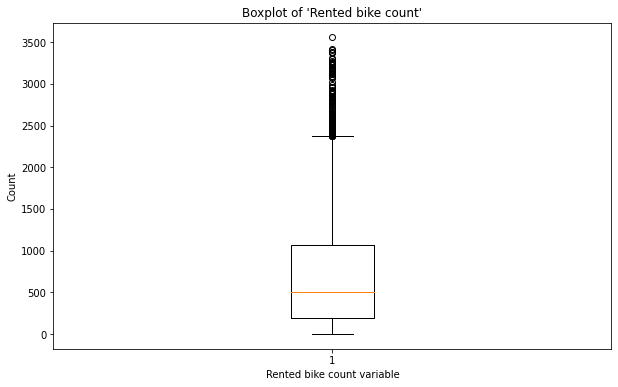

In [ ]:
#checking outliers using a box plot
plt.figure(figsize=(10,6))
plt.boxplot(seoul_df['Rented Bike Count'])
plt.xlabel('Rented bike count variable')
plt.ylabel('Count')
plt.title("Boxplot of 'Rented bike count'")

It can clearly be seen that the variable has a lot of outliers on the maximum side(~2500). We will deal with all the outliers later in the analysis.
Furthermore, now we will be checking the destribution of our Variable(Rented Bike Count)

Text(0.5, 1.0, 'Distribution plot for rented bike count')

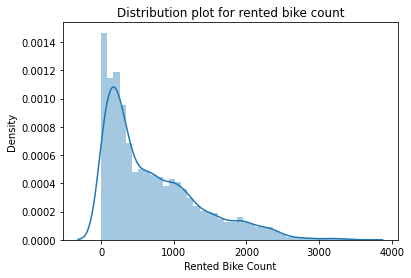

In [ ]:
#checking the distribution of the Dv
sns.distplot(seoul_df['Rented Bike Count'])
plt.title('Distribution plot for rented bike count')

Looks like our variable is positively skewed as can be seen on the plot. Let's take square root of our dv( as it is moderately skewed) and draw the plot. It will give us more clarification about data and we can visualize in a better way.

Text(0.5, 1.0, 'Sqrt transformed rented bike count')

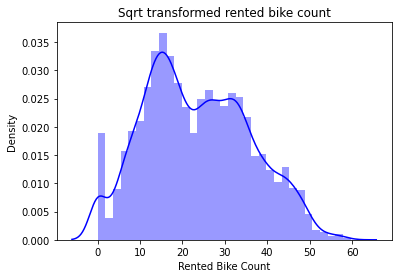

In [ ]:
# checking the distribution of dv after transformation
sns.distplot(np.sqrt(seoul_df['Rented Bike Count']),color='b')
plt.xlabel('Rented Bike Count')
plt.title('Sqrt transformed rented bike count')

After applying a transformation we can see that our dv is somewhat resembling a normal distribution. Now we dont have to take care of the outliers as transformation has done the job for us.

**2. Functioning day**

It is a categorical variable with two values 'Yes' And 'No' as shown below. It tells us that whether the day was a normal business day for a company or not.

In [ ]:
# finding the categories of this variable
print('The categories in functioning day are: ',seoul_df['Functioning Day'].unique().tolist())

The categories in functioning day are:  ['Yes', 'No']


Let us find the count of each one of these category and visualize them.

In [ ]:
# finding the count of Yes and No
seoul_df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

Text(0.5, 1.0, 'Countplot fro the variable Functioning Day')

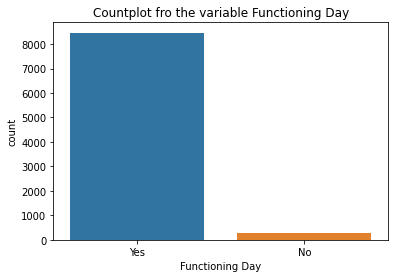

In [ ]:
#visualizing the count
sns.countplot(seoul_df['Functioning Day'])
plt.title('Countplot fro the variable Functioning Day')

We can deduce from the above plot that the majority of the class is 'Yes' and there is almost 3% of the class 'No'. Hence, it would be preferrable to drop this column during out model fitting.


**3. Holiday**

It is a categorical variable having two classes 'No holiday' and 'Holiday'. Can be an important variable because there would be more demand during holidays as people like to tour during holidays. Lets see!

In [ ]:
#Finding the categories of this variable
print('The categories in the variable Holiday are :', seoul_df['Holiday'].unique().tolist())

The categories in the variable Holiday are : ['No Holiday', 'Holiday']


In [ ]:
#Lets find the value count and visualize them

#Finding the value count of the variable
seoul_df['Holiday'].value_counts()


No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

Text(0.5, 1.0, 'Countplot for the variable Holiday from seoul_df ')

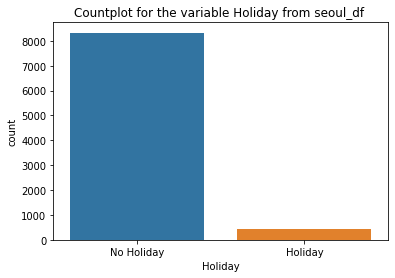

In [ ]:
#Visualizing the value counts
sns.countplot(seoul_df['Holiday'])
plt.title('Countplot for the variable Holiday from seoul_df ')

Here, once again we can deduce that this variable is unbalanced. We have majority of one class here and other class being only around 5%. Hence we will drop this column during fitting Linear regression.



Thats because we have around 95 percent belonging to a single class. Thus, if we get a new set of observations to predict, there is 95% probability that it will belong to the majority class. If you want to keep both classes for modelling, it would be better to get more data and look for better proportions of the classes, that would have an impact on our dv. 

**4. Seasons**

It is a categorical variable having categories Winter, Spring, Summer and Autumn as shown below. Let us also find the counts of each categories.

In [ ]:
# finding the categories of season variable
print('The categories in seasons are: ',seoul_df['Seasons'].unique().tolist())

The categories in seasons are:  ['Winter', 'Spring', 'Summer', 'Autumn']


In [ ]:
#Finding the value count for the variable seasons
seoul_df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

Lets take some time visualizing the variable

Text(0.5, 1.0, 'Counts of each season')

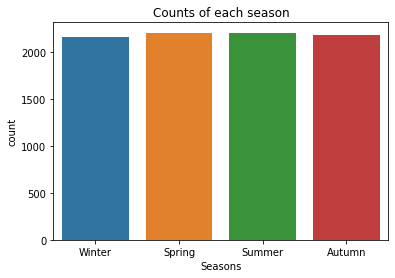

In [ ]:
sns.countplot(seoul_df['Seasons'])
plt.title('Counts of each season')

Cleary we have an equal proportions of each of the seasons. We will see if this has any effect on our dv in our multivariate analysis and if it does, will surely encode this in our prediction model.

**5. Date**

It is a numerical variable which tells us the date of bookings. Let us see the count of how many days we have. For that we will try to separate the date column into days, months and years.


In [ ]:
#making a function to seperate date, month and year respectively
def seperate_year(date):
  return date[6:]
def seperate_month(date):
  return date[3:5]
def seperate_day(date):
  return date[0:2]

In [ ]:
# creating a copy of our dataframe to apply changes.
seoul_df_copy=seoul_df.copy()

In [ ]:
#making new columns
seoul_df_copy['Day'] = seoul_df_copy['Date'].apply(seperate_day)
seoul_df_copy['Month'] = seoul_df_copy['Date'].apply(seperate_month)
seoul_df_copy['Year'] = seoul_df_copy['Date'].apply(seperate_year)
seoul_df_copy.head(1)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,2017


3 more columns have been created.
Next, lets check the different no of months and years we have

In [ ]:
# checking no of years and their respective value counts
print('The different # of years we have is: ',seoul_df_copy['Year'].unique().tolist())

print(seoul_df_copy['Year'].value_counts())


The different # of years we have is:  ['2017', '2018']
2018    8016
2017     744
Name: Year, dtype: int64


Text(0.5, 1.0, 'Count of Years')

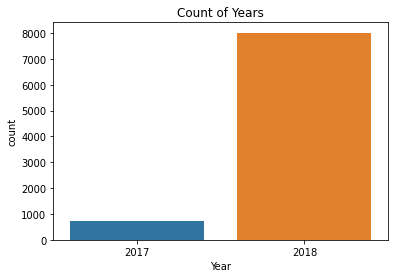

In [ ]:
# visualizing it
sns.countplot(seoul_df_copy['Year'])
plt.title('Count of Years')

Looks like we have most of the data from year 2018. Again we will drop this column in our analysis. Let us now have a look at months.

In [ ]:
# finding the counts of month
seoul_df_copy['Month'].value_counts()

12    744
01    744
03    744
05    744
07    744
08    744
10    744
04    720
06    720
09    720
11    720
02    672
Name: Month, dtype: int64

Text(0.5, 1.0, 'Count of each months')

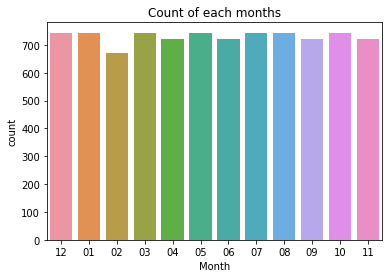

In [ ]:
# visualizing the counts of month
sns.countplot(seoul_df_copy['Month'])
plt.title('Count of each months')

We have almost equal no. of records for each month. We will keep this column in our analysis for now. Lets see the days.

In [ ]:
# finding the counts of days
seoul_df_copy['Day'].value_counts()

01    288
02    288
28    288
27    288
26    288
25    288
24    288
23    288
22    288
21    288
20    288
19    288
18    288
17    288
16    288
15    288
14    288
13    288
12    288
11    288
10    288
09    288
08    288
07    288
06    288
05    288
04    288
03    288
29    264
30    264
31    168
Name: Day, dtype: int64

Text(0.5, 1.0, 'Count of each day')

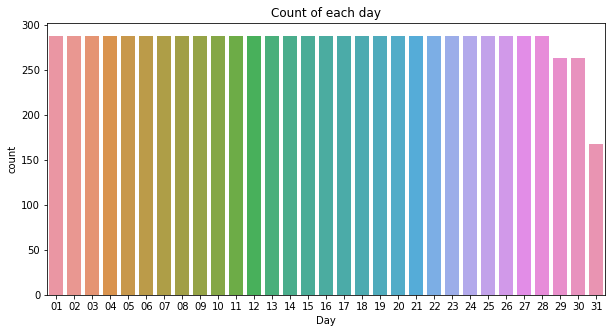

In [ ]:
# visualizing the counts of days
plt.figure(figsize=(10,5))
sns.countplot(seoul_df_copy['Day'])
plt.title('Count of each day')

Looks like we have equal no. of observations for each with little less observations for last days of the months.

Now, let us analyse the numerical variables using boxplot. We will run a for loop to fasten our analysis.

**6. All numerical variables**

In [ ]:
# first let us find the descriptive stats of our numerical variables
seoul_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Looking at the descriptions we can see last three colums, rainfall, snowfall, solar radiation have mostly 0 values. Let us confirm using box plot and distplots.

In [ ]:
# creating a list of numerical variable
list_of_nv=['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
            'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)','Snowfall (cm)']

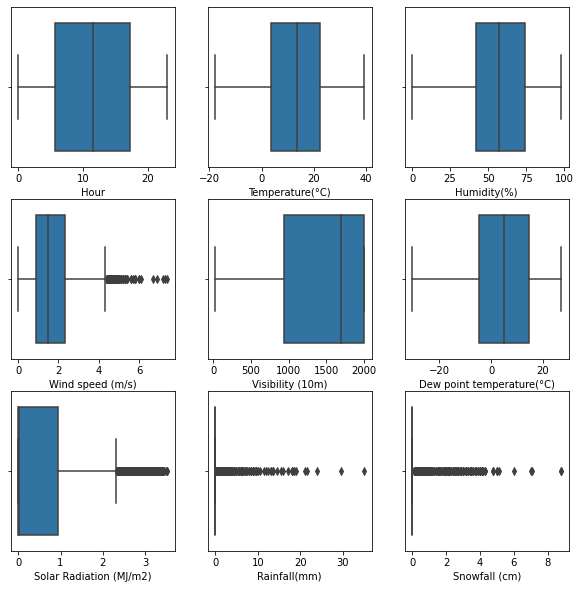

In [ ]:
# running a for loop over each of the variables
plt.figure(figsize=(10,10))
for index,item in enumerate(list_of_nv):
  plt.subplot(3,3,index+1)
  sns.boxplot(seoul_df[item])

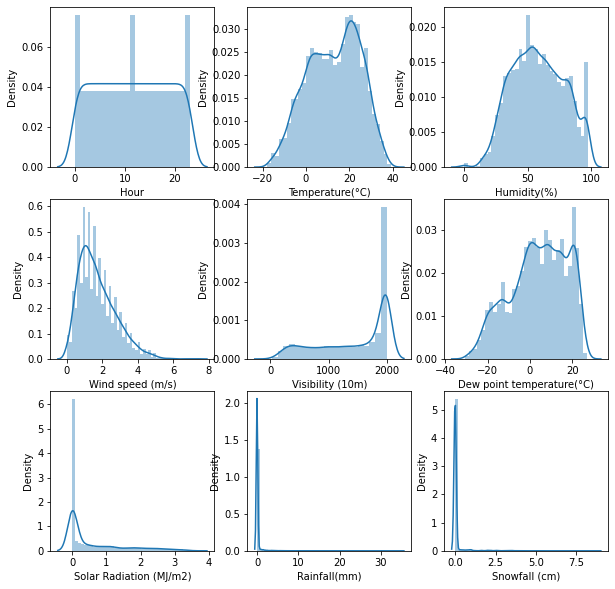

In [ ]:
# checking the distribution
plt.figure(figsize=(10,10))
for index,item in enumerate(list_of_nv):
  plt.subplot(3,3,index+1)
  sns.distplot(seoul_df[item])

Awesome! Looks like we dont have much outliers in our numerical variables. Also variable such as rainfall and snowfall have almost all zeroes. There are also variables such as visiblity and solar radiation which as skewed. We will handle them later in the analysis.

# **Observations from univariate analysis**

1. Our dv was slightly positively skewed. We applied square root transformation to make it somewhat normally distributed. Thus handling the outliers as well.

2. Variables such as functioning day, holiday, year had majority of one class. We decided to drop these columns.

3. Some numerical variables had maximum 0 values such as snowfall and rainfall.

# **Multivariate Analysis**


In [ ]:
# changing the data types of day and month column 
seoul_df_copy['Day']=seoul_df_copy['Day'].astype('int64')
seoul_df_copy['Month']=seoul_df_copy['Month'].astype('int64')

Text(0.5, 1.0, 'Heatmap')

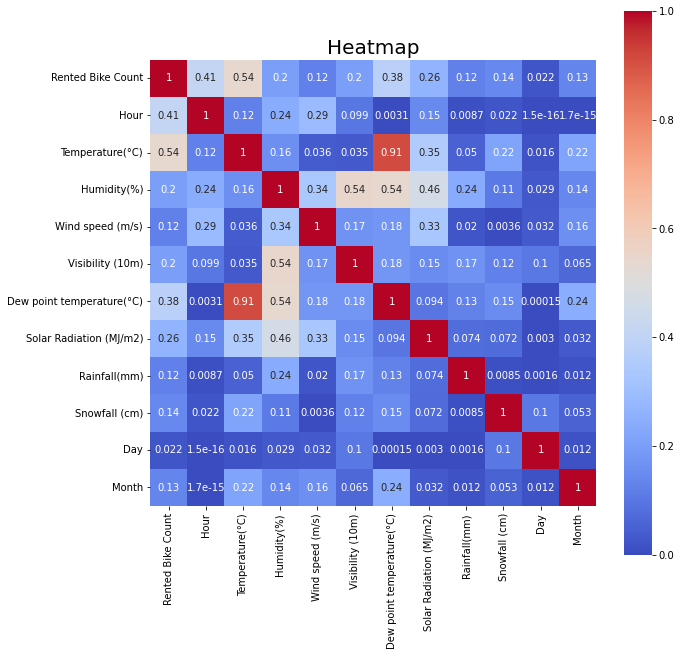

In [ ]:
# finding the correlation using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(abs(seoul_df_copy.corr()),cmap='coolwarm', annot=True, square=True)
plt.title('Heatmap',fontsize=(20))

Looking at the heatmap above we can observe:

1. There is not much correlation between most of the variables.

2. We can see heavy correlation in two variables i.e., Dew point temperature and Temperature.

3. One important thing to note here is, while doing linear regression one assumption it demands is that the independent variables should show some linear relation with our dependent variable but here we see that there is very less correlation with our dv, rented bike count. In cases such as these, Linear regression might not show good results.

Let us now find the **variation inflation factor(VIF)** for these variables that will give us a clear picture of multicollinearity

In [ ]:
# Defining a function to calculate VIF
def calc_vif(X):
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [ ]:
# calculating vif
calc_vif(seoul_df_copy[[i for i in seoul_df_copy.describe().columns if i not in ['Rented Bike']]])

,variables,VIF
0,Rented Bike Count,4.143377
1,Hour,5.046304
2,Temperature(°C),41.066993
3,Humidity(%),8.552434
4,Wind speed (m/s),4.882107
5,Visibility (10m),9.493999
6,Dew point temperature(°C),19.974876
7,Solar Radiation (MJ/m2),2.932098
8,Rainfall(mm),1.104618
9,Snowfall (cm),1.144220


Here we can observe there is high vif for temperature and dew point temperature(41 and 19 respectively) as seen earlier from the heatmap that they were highly correlated. Our goal now becomes to bring those no. down to less than 10. Let us try by removing the variable dew point temperature.


In [ ]:
# calculating vif
calc_vif(seoul_df_copy[[i for i in seoul_df_copy.describe().columns if i not in ['Rented Bike','Dew point temperature(°C)']]])

,variables,VIF
0,Rented Bike Count,4.110260
1,Hour,4.708249
2,Temperature(°C),4.498110
3,Humidity(%),7.121979
4,Wind speed (m/s),4.675694
5,Visibility (10m),5.555559
6,Solar Radiation (MJ/m2),2.286121
7,Rainfall(mm),1.104021
8,Snowfall (cm),1.139761
9,Day,3.786169


Great we have now brought all the vif values around 5, thus handling multicollinearity. Let us now find the relationship of all variables with our dv.

# **1. Seasons(categorical variable)**

Text(0, 0.5, 'rented bike count mean')

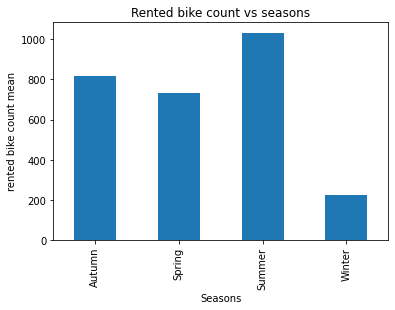

In [ ]:
# checking the mean rented bike count in each seasons.
seoul_df_copy.groupby(['Seasons'])['Rented Bike Count'].mean().plot(kind='bar')
plt.title('Rented bike count vs seasons')
plt.ylabel('rented bike count mean')

Text(0.5, 1.0, 'Rented bike count vs seasons')

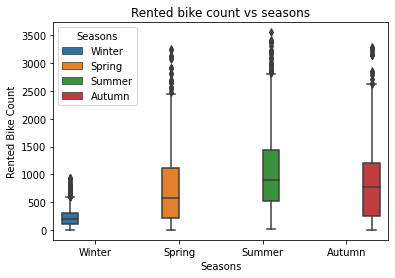

In [ ]:
# visualize using boxplot
sns.boxplot(x=seoul_df_copy['Seasons'],y=seoul_df_copy['Rented Bike Count'],hue=seoul_df_copy['Seasons'])
plt.title('Rented bike count vs seasons')

It looks like for summer the bikes demand is high and for winters the demand is less and it makes sense because most peple would avoid bike rides during the winter time. Reasonable to include this variable in our analysis. We will hot encode them later. Let us have a look at scatter plots of each numerical variable.

# **2. All numerical variables**

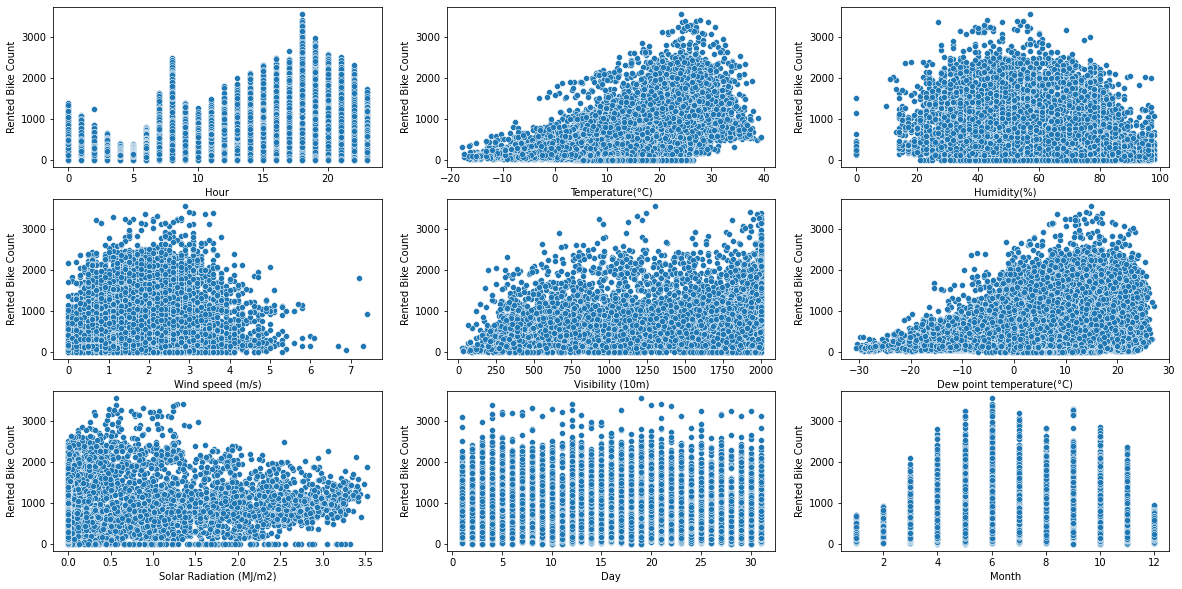

In [ ]:
# creating a list of nv we need
list2=[i for i in seoul_df_copy.describe().columns.to_list() if i not in ['Snowfall (cm)','Rainfall(mm)','Rented Bike Count']]

# running a for loop over list2
plt.figure(figsize=(20,10))
for index,i in enumerate(list2):
  plt.subplot(3,3,index+1)
  sns.scatterplot(x=seoul_df_copy[i],y=seoul_df_copy['Rented Bike Count'])

Observations drawn from the scatter plots are as follows:

1. Demand for bikes is higher during morning hours and hours between 15 and 20. This maybe due to normal environment conditions when there is less heat and also starting and ending office hours.

2. Demand is high when temperatures are high, visibility is high.

3. Demand is high when windspeed is less and solar radiation is less.

4. Demand is high during medium humidity.

5. Demand is almost the same for each day.

6. Demand is high during mid term of a year.

It seems there is some relationship between our numerical variables and dependent variable as seen above. Hence we can proceed further with our Linear regression.



# **2. Data Wrangling**

###**Checking for missing values**

In [ ]:
# checking for missing values
print('The no. of missing values in each variable:\n',seoul_df_copy.isna().sum())

The no. of missing values in each variable:
 Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Day                          0
Month                        0
Year                         0
dtype: int64


###**Checking for Outliers**

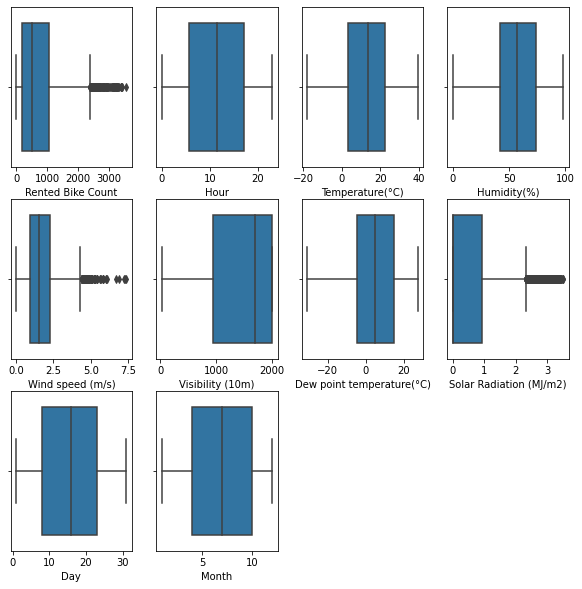

In [ ]:
# looking for outliers using box plot
plt.figure(figsize=(10,10))
for index,item in enumerate([i for i in seoul_df_copy.describe().columns.to_list() if i not in ['Rainfall(mm)','Snowfall (cm)']]):
  plt.subplot(3,4,index+1)
  sns.boxplot(seoul_df_copy[item])

Looks like we dont have outliers in most of the varaibles except:

1. We have handled ouliers in our dv 'Rented bike count' by applying transformation.

2. Wind speed and solar radiation have outliers but as they are not that far from the maximum values we will keep them.

###**Removing columns**

In [ ]:
# removing columns
seoul_df_copy.drop(columns=['Date','Dew point temperature(°C)','Rainfall(mm)','Snowfall (cm)','Holiday','Functioning Day','Year'],inplace=True)

In [ ]:
# checking our dataframe
seoul_df_copy.head(1)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Seasons,Day,Month
0,254,0,-5.2,37,2.2,2000,0.0,Winter,1,12


# **Encoding**
This process refers to changing our categorical variable into numerical variable by changing classes into 0 or 1. This is important because machine learning models cannot process categorical variables and hence they must be converted. We will use a technique called One hot encoding to convert from categorical to numerical.

In [ ]:
# One hot encoding the season variable
seoul_df_copy=pd.get_dummies(seoul_df_copy,columns=['Seasons'])

In [ ]:
# Avoiding dummy trap by dropping any one of the dummy column
seoul_df_copy.drop(columns='Seasons_Autumn',inplace=True)

In [ ]:
# checking the changes
seoul_df_copy.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Day,Month,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,37,2.2,2000,0.0,1,12,0,0,1
1,204,1,-5.5,38,0.8,2000,0.0,1,12,0,0,1


Now our dataframe is ready for the regression machine learning algorithms. There are many algorithms to predict regression tasks. Some of them are Linear regression, Random Forest, XGBoost, SVR , DTR etc. We will have a look at those in detail.

# **3. Train-Test split and Standardization**

In [ ]:
# let us have a look at our independent features
features=seoul_df_copy.columns.tolist()
features.pop(0)
print('The independent features are:\n',features)

The independent features are:
 ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Day', 'Month', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter']


In [ ]:
# creating a variable to store independent features and dependent feature
X=seoul_df_copy[features]
y=seoul_df_copy['Rented Bike Count']

In [ ]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # random_state=0 to ensure same observations in each set everytime we run 

In [ ]:
# checking the shapes
print(f'The shapes of train and test set for independent variables are: X_train={X_train.shape}, X_test={X_test.shape}')
print(f'The shapes of train and test set for dependent variables are: y_train={y_train.shape}, y_test={y_test.shape}')

The shapes of train and test set for independent variables are: X_train=(7008, 11), X_test=(1752, 11)
The shapes of train and test set for dependent variables are: y_train=(7008,), y_test=(1752,)


Now that we have splitted our data other important step one should perform, is to standardize or normalize the independent variables. This is to ensure a consistent range of values are fed into the model. Also it make the predictors mean 0 so it is easy to find the intercept. We will be using StandardScaler to standardize our data. It is the process of rescaling one or more attributes so that they have a mean value of 0 and a standard deviation of 1.

In [ ]:
# standardizing the independent variables
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:
# after transformation
X_train

array([[ 0.50774916, -0.38874606,  0.18996015, ..., -0.57866842,
        -0.57910781,  1.7507042 ],
       [ 0.9408263 ,  1.29850393, -0.05608294, ..., -0.57866842,
         1.72679419, -0.57119872],
       [-0.06968702,  1.42379477, -0.05608294, ..., -0.57866842,
         1.72679419, -0.57119872],
       ...,
       [-0.06968702,  1.05627497, -0.05608294, ..., -0.57866842,
         1.72679419, -0.57119872],
       [-1.65763652, -0.38039334,  0.0423343 , ...,  1.72810536,
        -0.57910781, -0.57119872],
       [ 1.22954439, -0.48062601,  1.22334111, ...,  1.72810536,
        -0.57910781, -0.57119872]])

# **1. Linear Regression**

In [ ]:
# making a Linear regression model
linear_regressor=LinearRegression()

In [ ]:
#fitting the data
linear_regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
# predicting for both train and tesst data
y_pred_train = linear_regressor.predict(X_train)
y_pred_test = linear_regressor.predict(X_test) 

In [ ]:
# checking the intercept
linear_regressor.intercept_

708.9410673515981

In [ ]:
# checking the coefficients
linear_regressor.coef_

array([ 191.89670191,  278.69659342, -176.70549543,   13.56585771,
         10.8959773 ,  -66.40732922,    6.07479304,   14.43380787,
        -10.74193473,    5.6523188 , -123.27758335])

In [ ]:
# finding each of the metrics for training set
print('The evaluation metric values for training set - Linear regression:')
print('The MAE of training set = ',mean_absolute_error(y_train, y_pred_train))
print('The MSE of training set = ',mean_squared_error(y_train, y_pred_train))
print('The R2_score of training set = ',r2_score(y_train, y_pred_train))

The evaluation metric values for training set - Linear regression:
The MAE of training set =  343.96971271321956
The MSE of training set =  216410.52314362448
The R2_score of training set =  0.4788340504581847


Here we can observe that our r2 score is 0.48, hence, we can deduce that our model is not able to captue most of the data variance. We will save it in a dataframe for future comparison

In [ ]:
# storing the train set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression',
       'MAE':round(mean_absolute_error(y_train, y_pred_train)),
       'MSE':round(mean_squared_error(y_train, y_pred_train)),
       'R2_score':r2_score(y_train, y_pred_train)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [ ]:
# finding each metrics for test set
print('The evaluation metric values for test set - Linear regression:')
print('The MAE of test set = ',mean_absolute_error(y_test, y_pred_test))
print('The MSE of test set = ',mean_squared_error(y_test, y_pred_test))
print('The R2_score of test set = ',r2_score(y_test, y_pred_test))

The evaluation metric values for test set - Linear regression:
The MAE of test set =  353.7983355922454
The MSE of test set =  226674.44813441046
The R2_score of test set =  0.4583937536763766


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression',
       'MAE':round(mean_absolute_error(y_test, y_pred_test)),
       'MSE':round(mean_squared_error(y_test, y_pred_test)),
       'R2_score':r2_score(y_test, y_pred_test)
       }
test_df=pd.DataFrame(dict2,index=[1])

The r2_score for the test set is 0.45. This means our linear model is not performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

Text(0.5, 0, 'Actual Values')

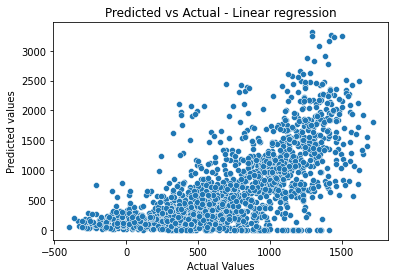

In [ ]:
#visualizing the predictions
sns.scatterplot(x=y_pred_test,y=y_test)
plt.title('Predicted vs Actual - Linear regression')
plt.ylabel('Predicted values')
plt.xlabel('Actual Values')

As we can see from the figure above that predicted and actual values have a lot of variance.

Text(0.5, 1.0, 'Residual Analysis - Linear regression')

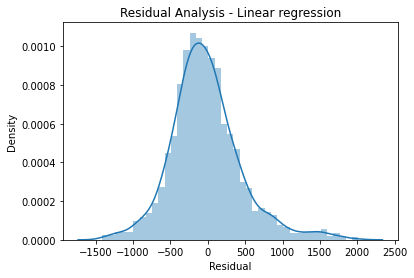

In [ ]:
# residual analysis
sns.distplot(((y_test)- (y_pred_test)))
plt.xlabel('Residual')
plt.title('Residual Analysis - Linear regression')

Text(0.5, 1.0, 'Predicted values vs residuals - Heteroscedasticity(LR)')

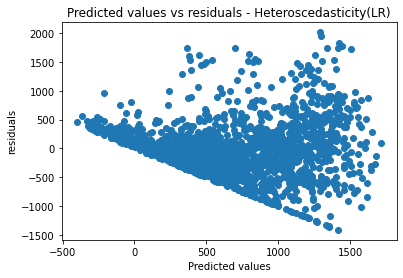

In [ ]:
# checking for heteroscedasticity
plt.scatter(y_pred_test,y_test-y_pred_test)
plt.xlabel('Predicted values')
plt.ylabel('residuals')
plt.title('Predicted values vs residuals - Heteroscedasticity(LR)')

It looks like our model has heteroscedasticity. One of the assumptions of linear regression is that there should be homoscedasticity i.e., constant variance throughout. Some ways in which we can treat homoscedasticity are:

1. Transform the dependent variable

2. Redefine the dependent variable

3. Use weighted regression

We can go back and try fixing our analysis from first. But do we have another option? Yes! ofcourse, we can try implementing different models.

Question: Why cant we try and fix our analysis so that this model performs better?

Thats because, we have N no of options. Maybe this model was not built for this type of data. It is always a thing to note that not every type of data can be fitted over a single model and perform miracles. There are some data like time series where linear regression would mostly fail.

# **2. Random ForestRegressor with GridSearchCV**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)
#Total 864 fits

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [ ]:
# predicting for both train and test
y_pred_train2=grid_search.predict(X_train)
y_pred_test2=grid_search.predict(X_test)

In [ ]:
# finding each of the metrics for training set
print('The evaluation metric values for training set - Random ForestRegressor with GridSearchCV:')
print('The MAE of training set = ',mean_absolute_error(y_train, y_pred_train2))
print('The MSE of training set = ',mean_squared_error(y_train, y_pred_train2))
print('The R2_score of training set = ',r2_score(y_train, y_pred_train2))


The evaluation metric values for training set - Random ForestRegressor with GridSearchCV:
The MAE of training set =  121.9865256939184
The MSE of training set =  39599.62565004445
The R2_score of training set =  0.9046350602382256


In [ ]:
# storing the train set metrics value in a dataframe for later comparison
dict1={'Model':'Random ForestRegressor with GridSearchCV',
       'MAE':round(mean_absolute_error(y_train, y_pred_train2)),
       'MSE':round(mean_squared_error(y_train, y_pred_train2)),
       'R2_score':r2_score(y_train, y_pred_train2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# finding each metrics for test set
print('The evaluation metric values for test set - Linear regression:')
print('The MAE of test set = ',mean_absolute_error(y_test, y_pred_test2))
print('The MSE of test set = ',mean_squared_error(y_test, y_pred_test2))
print('The R2_score of test set = ',r2_score(y_test, y_pred_test2))

The evaluation metric values for test set - Linear regression:
The MAE of test set =  188.37074267492602
The MSE of test set =  98235.0439814303
The R2_score of test set =  0.7652813810021063


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random ForestRegressor  with GridSearchCV',
       'MAE':round(mean_absolute_error(y_test, y_pred_test2)),
       'MSE':round(mean_squared_error(y_test, y_pred_test2)),
       'R2_score':r2_score(y_test, y_pred_test2)
       }
test_df=test_df.append(dict2,ignore_index=True)

# **3. XGBOOST REGRESSOR WITH GRIDSEARCHCV**

In [ ]:
# Setting the parameters to tune

# Number of trees
n_estimators = list(np.arange(40,50,2,dtype='int64'))

# Maximum depth of trees
max_depth = list(np.arange(3,5,1,dtype='int64'))

# learning rate
learning_rate=[0.28,0.26,0.27]

# min childs weight
min_child_weight=list(np.linspace(1,5,num=1,dtype='int64'))

# gamma
gamma=list(np.linspace(0,2,num=20,dtype='int64'))

# subsamples
subsample=[0.3,0.5,0.6] 

# HYperparameter Grid
params = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
               'min_child_weight':min_child_weight,
               'gamma':gamma,
               'subsample':subsample,
               'learning_rate':learning_rate}

In [ ]:
xgb_model=XGBRegressor(random_state=0,n_jobs=-1)

In [ ]:
xgb_grid = GridSearchCV(estimator=xgb_model,param_grid = params,cv = 5,scoring='neg_mean_squared_error',n_jobs=-1)
xgb_grid.fit(X_train,y_train)

[11:00:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, estimator=XGBRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'gamma': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
                                   1, 1, 1, 1, 2],
                         'learning_rate': [0.28, 0.26, 0.27],
                         'max_depth': [3, 4], 'min_child_weight': [1],
                         'n_estimators': [40, 42, 44, 46, 48],
                         'subsample': [0.3, 0.5, 0.6]},
             scoring='neg_mean_squared_error')

In [ ]:
print(xgb_grid.best_params_)

{'gamma': 0, 'learning_rate': 0.27, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 48, 'subsample': 0.6}


In [ ]:
# predicting for both train and test
y_pred_train3=xgb_grid.predict(X_train)
y_pred_test3=xgb_grid.predict(X_test)

In [ ]:
# finding each of the metrics for training set
print('The evaluation metric values for training set - XGBR with GridSearchCV:')
print('The MAE of training set = ',mean_absolute_error(y_train, y_pred_train3))
print('The MSE of training set = ',mean_squared_error(y_train, y_pred_train3))
print('The R2_score of training set = ',r2_score(y_train, y_pred_train3))

The evaluation metric values for training set - XGBR with GridSearchCV:
The MAE of training set =  161.74367356417727
The MSE of training set =  62648.394378423785
The R2_score of training set =  0.8491283627560362


In [ ]:
# storing the train set metrics value in a dataframe for later comparison
dict1={'Model':'XGBR with GridSearchCV',
       'MAE':round(mean_absolute_error(y_train, y_pred_train3)),
       'MSE':round(mean_squared_error(y_train, y_pred_train3)),
       'R2_score':r2_score(y_train, y_pred_train3)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# finding each metrics for test set
print('The evaluation metric values for test set - XGBR:')
print('The MAE of test set = ',mean_absolute_error(y_test, y_pred_test3))
print('The MSE of test set = ',mean_squared_error(y_test, y_pred_test3))
print('The R2_score of test set = ',r2_score(y_test, y_pred_test3))

The evaluation metric values for test set - XGBR:
The MAE of test set =  192.1705759935183
The MSE of test set =  94349.74074271113
The R2_score of test set =  0.7745647586402594


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'XGBR  with GridSearchCV',
       'MAE':round(mean_absolute_error(y_test, y_pred_test3)),
       'MSE':round(mean_squared_error(y_test, y_pred_test3)),
       'R2_score':r2_score(y_test, y_pred_test3)
       }
test_df=test_df.append(dict2,ignore_index=True)

Text(0.5, 0, 'Actual Values')

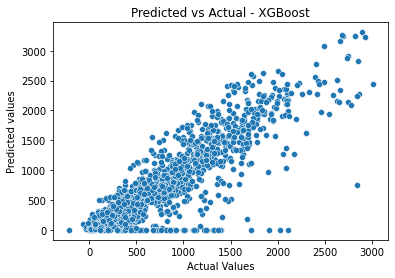

In [ ]:
#visualizing the predictions
sns.scatterplot(x=y_pred_test3,y=y_test)
plt.title('Predicted vs Actual - XGBoost')
plt.ylabel('Predicted values')
plt.xlabel('Actual Values')

As we can see from the figure above the predictions and actual values have somewhat got squeezed more as compared to the previous graphs.

Let us now try to find the feature imporatances i.e., what all are the most important features that are contributing most towards the model predictions.

In [ ]:
xgb_optimal_model2=xgb_grid.best_estimator_

In [ ]:
# finding feature importance
importances = xgb_optimal_model2.feature_importances_

list3=list(seoul_df_copy.columns)
list3.pop(0)

importance_dict = {'Feature' : list3,
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
# lets see the importances
importance_df=importance_df.sort_values(by=['Feature Importance'],ascending=False)
importance_df

,Feature,Feature Importance
1,Temperature(°C),0.22
10,Seasons_Winter,0.22
0,Hour,0.18
2,Humidity(%),0.13
5,Solar Radiation (MJ/m2),0.11
7,Month,0.06
9,Seasons_Summer,0.03
4,Visibility (10m),0.02
6,Day,0.02
3,Wind speed (m/s),0.01


<AxesSubplot:title={'center':'Feature Importance'}, xlabel='Feature Importance', ylabel='Feature'>

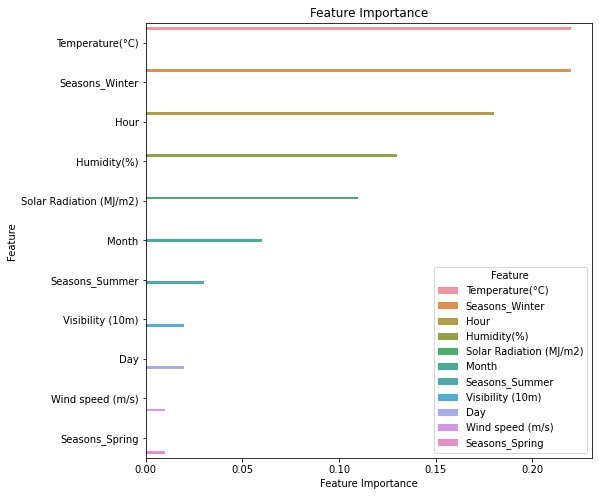

In [ ]:
# visualizing feature importance 
plt.figure(figsize=(8,8))
plt.title('Feature Importance')
sns.barplot(x=importance_df['Feature Importance'],y=importance_df['Feature'],hue=importance_df['Feature'])

As we can see the top 5 important features of our dataset are: Temperature(C), Seasons_Winter, Hour, Humidity and Solar Radiation(Mj/m2)

# **5. Model Explainability**

**Model Explainability** is the process of explaining and interpreting machine learning models. It is a way to know what is going on inside the model and how it is able to produce the desired results.

Here we are going to implement 'shap' techniques to understand our model behaviour.

SHAP stands for SHapley Additive exPlanations. SHAP values interpret the impact of having a certain value for a given feature in comparison to the prediction we would make if that feature took some baseline value.

In [ ]:
# importing shap
!pip install shap
import shap
shap.initjs()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 9.2 MB/s eta 0:00:00


In [ ]:
# creating a shap instance for training set
X_train_val=pd.DataFrame(X_train,columns=list3)
explainer_train = shap.TreeExplainer(xgb_optimal_model2)
shap_values_train = explainer_train.shap_values(X_train_val)

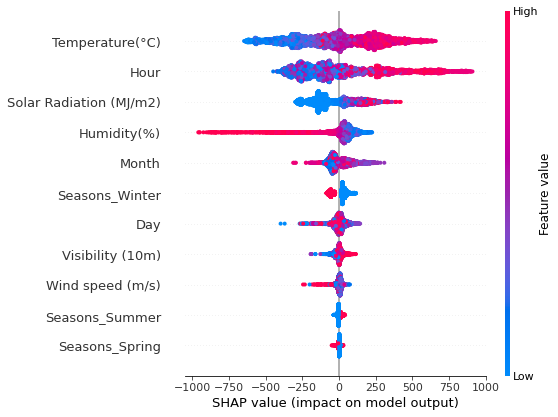

In [ ]:
# visualizing
shap.summary_plot(shap_values_train,X_train_val,plot_type='dot')

In [ ]:
# creating a shap instance for test set
X_test_val=pd.DataFrame(X_test,columns=list3)
explainer_train = shap.TreeExplainer(xgb_optimal_model2)
shap_values_test = explainer_train.shap_values(X_test_val)

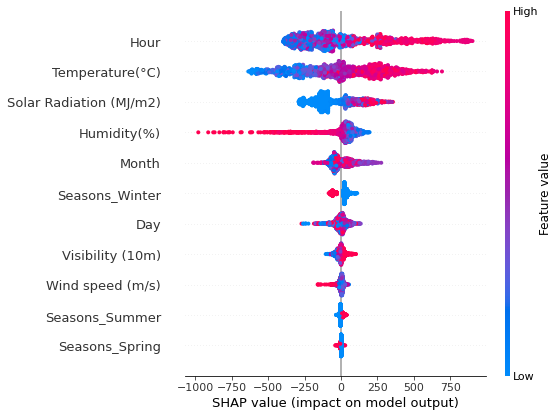

In [ ]:
# visualize
shap.summary_plot(shap_values_test,X_test_val,plot_type='dot')

The shap summary plots tells us:

1. The most important features that are impacting our predictions are on the top.

2. Each dots in the plot are observations/rows of the dataset. Red colour indicate they have a high value and blue colour indicate they have a low value.

3. The x-axis has shap values with median 0. A positive value of shap indicates that the observation values are increasing the value of prediction and vice-versa.

Observing the plot we can conclude:

1. Features such as hour, temperature, humidity, solar radiation, month have a large impact on model predictions.

2. Higher values of hour are increasing the predicted values and vice-versa. This tells that the demand is high during the evening and night hours.

3. Higher values of temperature are increasing the predicted values and vice-versa. As we have values from negative to positive temperatures, this tells us that demand is high when the sun is out.

4. Lower values of humidity are increasing the predicted values and vice-versa. This tells us that demand is less when humidity is high.

5. Lower values of month are increasing the predicted values and vice-versa. This tells us that demand decreases when winter season approaches.

Let us now find the dependence plot that tells the relationship of two variable that has a effect on predictions.

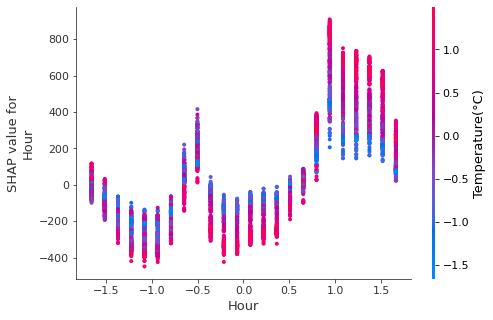

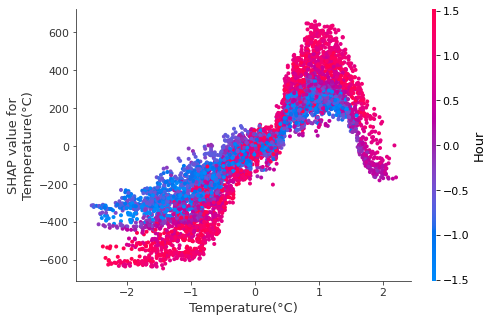

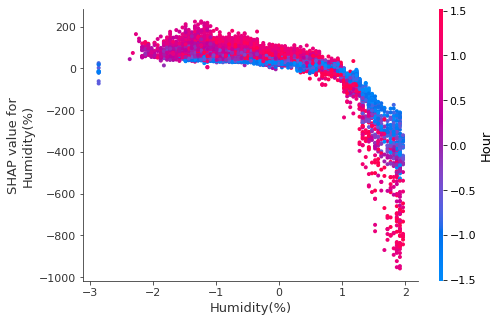

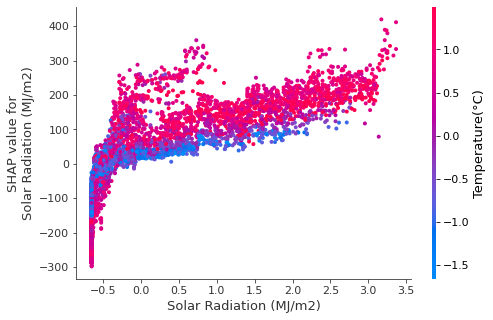

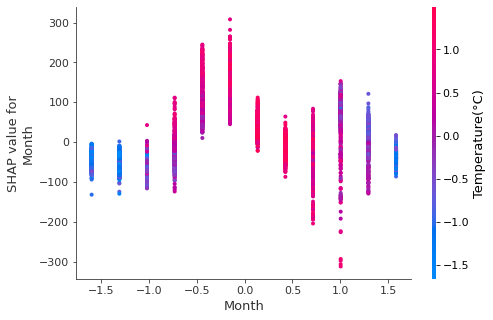

In [ ]:
# finding dependence plot for top 5 features
top_vars = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Solar Radiation (MJ/m2)','Month']
for elem in top_vars:
  shap.dependence_plot(elem, shap_values_train, X_train_val)

We observe:

1. Higher value of hour and temperature are increasing the prediction value.

2. Lower values of temperature and month are decreasing the predicted values.

3. High values of humidity and mixed values of hour are decreasing the predicted values.

4. Low values of month and high values of temperature are increasing predicted values.

Next we have force plot which can be drawn for each observation and see what features are playing a role in determining the predictions for that observation. We have a base value which is the mean predicted value(like an intercept) and the blue colour represents features pushing the predicted value lower than the mean value and red colour are those features which are pushing the predicted value higher. Let us look at force plot for 2 observations.

In [ ]:
# force plot for 1st observation
shap.initjs()
shap.force_plot(explainer_train.expected_value, shap_values_train[0,:], X_train_val.iloc[0,:])

Here we can see the blue colour is dominant in pushing the predicted value lower. Temperature, season winter, visiblity are the big pushers.
Similarly we can explain each observation in training and test set using force plot.

# **6. Conclusion**

In [ ]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model  MAE     MSE  \
Training set 0                          Linear regression  344  216411   
             1   Random ForestRegressor with GridSearchCV  122   39600   
             2                     XGBR with GridSearchCV  162   62648   
Test set     0                          Linear regression  354  226674   
             1  Random ForestRegressor  with GridSearchCV  188   98235   
             2                    XGBR  with GridSearchCV  192   94350   

                R2_score  
Training set 0  0.478834  
             1  0.904635  
             2  0.849128  
Test set     0  0.458394  
             1  0.765281  
             2  0.774565

 **RESULTS**
1. Linear Regresssion : Underfit Model
2. Rando ForestRegressor with GridsearchCV : Overfit Model
3. XGBR with GridsearchCV : Best Model(According to observation)

However, this is not the ultimate end. As this data is time dependent, the values for variables like temperature, windspeed, solar radiation etc., will not always be consistent. Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time. Therefore, having a quality knowledge and keeping pace with the ever evolving ML field would surely help one to stay a step ahead in future.
